# AUC ML LabExercise - Univariate Linear Regression


In [3]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In this exercise you are going to implement univariate linear regression. You will implement a gradient descent procedure to iteratively search for the solution. 
$$
\newcommand{\ls}[1]{{}^{(#1)}}
\renewcommand{\v}[1]{\boldsymbol{#1}}
\renewcommand{\T}{{}^T}
\newcommand{\matvec}[1]{\begin{pmatrix}#1\end{pmatrix}}
$$

## Theory I

Given the data $(x\ls 1,y\ls 1),\ldots,(x\ls m, y\ls m)$ where the $x$ values are the independent variables, these values are error free. The dependent values $y$ do contain errors.

Linear regression fits a model function (*hypothesis*) $h_{\v\theta}(x)$ such that the sum of squared errors is minimized:
$$
J(\v\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\v\theta}(x\ls i) - y\ls i)^2
$$
Linear regression is called *linear* regression because we assume the hypothesis function $h_{\v\theta}$ is linear in its parameters $\v\theta$:
$$
h_{\v\theta}(x) = \theta_0 \phi_0(x) + \cdots + \theta_n \phi_n(x)
$$
where $\phi_0,\ldots,\phi_n$ are arbitrary functions in $x$. In case we write:
$$
\v x = \matvec{\phi_0(x)\\\vdots\\\phi_n(x)}
$$
the hypothesis function becomes:
$$
h_{\v\theta}(x) = \v\theta\T \v x
$$
and the cost function is:
$$
J(\v\theta) = \frac{1}{2m} \sum_{i=1}^{m} (\v\theta\T\v x\ls i - y\ls i)^2
$$
The gradient is given by:
$$
\frac{\partial J(\v\theta)}{\partial \v\theta} =
\frac{1}{m} \sum_{i=1}^{m} (\v\theta\T\v x\ls i - y\ls i) \v x
$$

## Linear Regression in Practice I

We start with a simple example. We will generate data with:
$$
   y\ls i = a x\ls i + b + R
$$
where $R$ is a random variable, i.e. its value is not exactly
known. We assume here that $R$ is normally distributed with mean zero
and standard deviation 0.3.

We collect all values $x\ls i$ for $i=1,\ldots,m$ in an array of shape ``(m,)``:

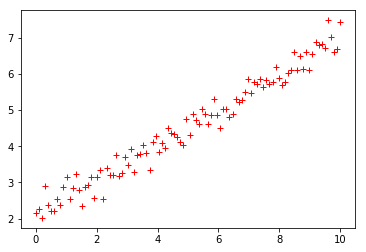

In [4]:
m = 100;
a = 0.5
b = 2
x = np.linspace(0,10,m)
y = a * x + b + 0.3 * random.randn(m)
plot(x, y, 'r+');

Observe that $x\ls i$ is stored in ``x[i]`` (and equivalently for $y$
and ``y``).

In this case we want to fit a model of the form $h_{\v\theta}(x)=a x + b$
to the data. Note that with 
$$
   \v x = \matvec{1\\x}
$$
(i.e. with $\phi_0(x)=1$ and $\phi_1(x)=x$) we have:
$$
   h_{\v\theta}(x) = \theta_0 + \theta_1 x
$$
where $\theta_0$ is $a$ and $\theta_0$ is $b$. A constant function
$\phi_0$ in a linear hypothesis (*linear in its parameters!*) is often
called a bias term of the model.

**Exercise:** Write a function ``cost(theta, x, y)`` that calculates the cost. Note that ``x`` is the vector with all $x\ls i$-values and ``y`` is the vector with all $y\ls i$ values.

In [7]:
def cost(theta0, theta1, x, y):
    hypothesis = theta0 + theta1*x
    result = (1/(2*x.size))*sum((hypothesis-y)**2)
    return result

print(0.3**2/2, cost(2, 0.5, x, y))

0.045 0.0357064245709


Your function called with ``cost(b,a,x,y)`` (where ``b``, ``a``,
``x`` and ``y``) are defined as in the previous code snippet,
should a return a value that is close to $0.3^2/2$ (For extra
points: can you prove this?).

**Exercise:** Write a function ``theta0, theta1 = gradDescentStep(theta0, theta1, x, y)`` that does the calculations for one gradient descent step. In this function we use the Python possibility to return a tuple of values.

In [ ]:
def gradDescentStep(learningrate, theta0, theta1, x, y):
    #your code here
    return theta0, theta1

We start with values ``theta0 = theta1 = 0``. Calculate the costfor these values. After the gradient descent step, using ``learningrate=0.01``, resulting in new theta values again calculate the cost. If all went well the cost should have decreased

In [ ]:
theta0 = theta1 = 0
costbefore = cost(theta0, theta1, x, y)
theta0, theta1 = gradDescentStep(0.01, theta0, theta1, x, y)
costafter = cost(theta0, theta1, x, y)
print(costbefore, '>=', costafter)

# Bonus Problem: Implement Least Squares with closed form solution

For the Least Squares method there is also a closed-form solution.

$\theta_1$ can be found by:
$$ \boldsymbol{\hat\theta_1} =( X ^TX)^{-1}X^{T}\boldsymbol y $$

You can leave $\theta_0$ to be 0. Make a plot with your data as dots and your prediction as a line.